In [6]:
import json
import matplotlib.pyplot as plt
import seaborn as sbs
import glob
import pandas as pd

/home/nguyen/miniconda3/lib/python3.8/site-packages/seaborn/categorical.py:3806: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 1080x576 with 0 Axes>

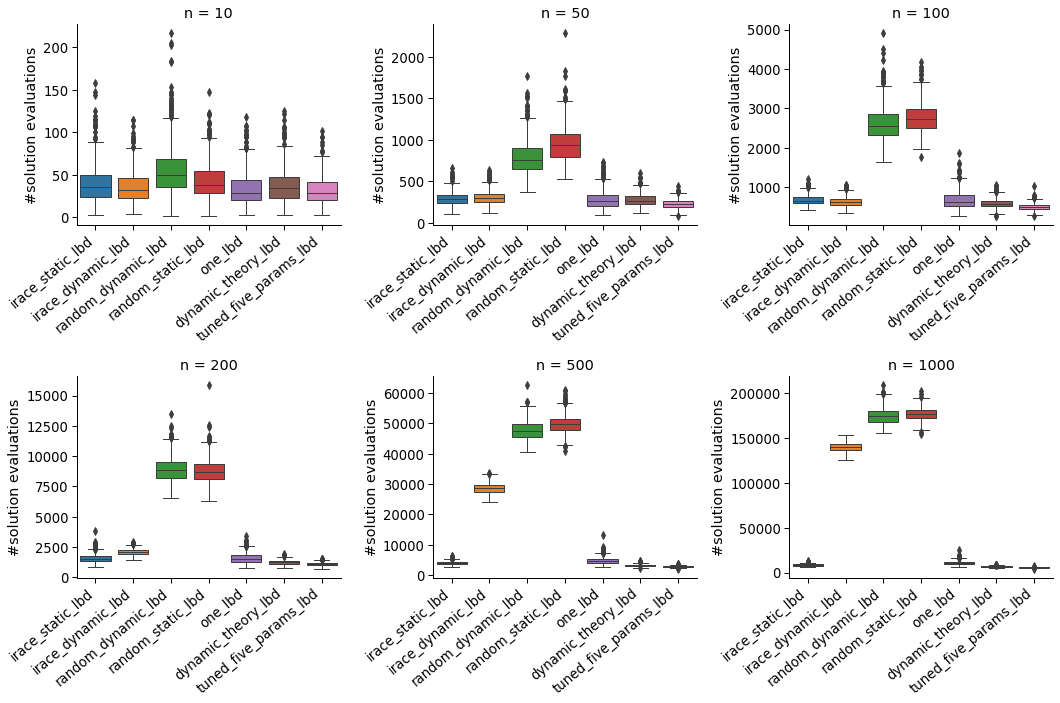

In [43]:
#### read results of each irace run and plot them

# read results of irace
t = pd.DataFrame(columns=['n','configuration','seed','nEvals'])
for fn in glob.glob("performace*.json"):
    n = int(fn.split("_")[1])    
    with open(fn, "rt") as f:
        irace_static_lbd_performance, irace_dynamic_lbd_performance, random_dynamic_lbd_performance, random_static_lbd_performance, one_lbd_performance, dynamic_theory_lbd_performance, tuned_five_params_lbd_performance = json.load(f)
    for name in ['irace_static_lbd','irace_dynamic_lbd','random_dynamic_lbd','random_static_lbd','one_lbd','dynamic_theory_lbd','tuned_five_params_lbd']:
        performance = globals()[name+'_performance']
        nRuns = len(performance)
        t = pd.concat([t, pd.DataFrame({'n': [n] * nRuns,
                                    'configuration': name,
                                    'seed': range(nRuns),
                                    'nEvals': performance
                                   })],
                     axis=0)

# make plots
sbs.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 1})
plt.figure(figsize=(15,8))
g = sbs.catplot(data=t, x='configuration',y='nEvals',col='n',sharey=False,col_wrap=3,kind='box',sharex=False,aspect=10/10)
for ax in g.axes:
    ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=40,ha='right')
    #ax.set(xlabel=None, ylabel='#solution evaluations')
    ax.set(xlabel=None, ylabel='#solution evaluations')
g.tight_layout()
g.savefig('plots/results_all.png')